## 1부 2장 로지스틱 회귀 모델과 판별 분석 모델

앞 장에서는 출력변수가 양적 출력변수 즉 셀수있는 출력변수로 예측문제를 다뤘습니다. 하지만 현실에 존재하는 변수의 종류는 양적 변수 뿐만 아니라 질적 변수도 존재합니다. 질적 변수는 셀 수 없는 변수를 의미하며 흔히 설문조사지의 5개 만족도나 클래스가 나뉘어지는 변수들로 주로 분류 문제에 사용됩니다. 그렇다면 선형회귀모델이 질적 출력변수도 제대로 분류가 가능할까요?

정답은 NO 입니다. 이유는 다음과 같습니다.
1. 출력변수가 질적인 경우 코딩을 할 때 0,1,2로 결과에 순서가 있다는 의미가 되기 때문에 회귀모델의 기본가정에 위배되게 됩니다. 
2. 굳이 선형회귀모델말고 다른 모델을 사용하는 것이 더 정확하고 안전성 있습니다.
3. 질적변수를 양적변수로 변환하는데는 한계가 있습니다.

~ 설명 좀 더 직관적으로 쉽게 적기

위와 같은 이유로 선형회귀모델은 분류문제에 적합한 모델이 아닙니다. 이후 부터는 분류문제에 적합한 모델들을 알아보도록 하겠습니다.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns    
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

### 2.1 로지스틱 회귀모델
분류문제를 해결하기 위한 모델로 대표적으로 사용되는 로지스틱 회귀모델을 사용하겠습니다. 로지스틱 회귀모델의 특징은 이진분류에 강점을 보인다는 점 입니다.

#### 2.1.1 데이터 구조 파악

ISLR 라이브러리에 포함된 Smarket 자료의 요약정로블 먼저 살펴볼 것 입니다. 이 자료는 2001년에서 2005년까지 1250일에 걸친 S&P 500 주가지수의 수익률로 구성되었으며 각 날짜에 이전 5일의 각 거래일에 대한 수익률이 기록되어 있습니다.

In [176]:
#  데이터를 불러와서 살펴보겠습니다.
df = pd.read_csv("./data/Smarket.csv",index_col=[0])
df

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1246,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1247,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1248,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1249,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


In [177]:
# 각 변수별 기초 통계량을 확인합니다.
df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [178]:
# 데이터의 자료형과 결측값, 행의 개수를 출력합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 1 to 1250
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1250 non-null   int64  
 1   Lag1       1250 non-null   float64
 2   Lag2       1250 non-null   float64
 3   Lag3       1250 non-null   float64
 4   Lag4       1250 non-null   float64
 5   Lag5       1250 non-null   float64
 6   Volume     1250 non-null   float64
 7   Today      1250 non-null   float64
 8   Direction  1250 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 97.7+ KB


In [179]:
# 질적변수인 Direction의 클래스 갯수를 알아보겠습니다.
df.groupby("Direction").count().iloc[:,0]

Direction
Down    602
Up      648
Name: Year, dtype: int64

#### 2.1.2 상관분석

출력변수인 Direction을 제외한 모든 입력변수들 간의 관련성을 알기 위하여 입력변수 간의 상관분석을 진행하겠습니다.

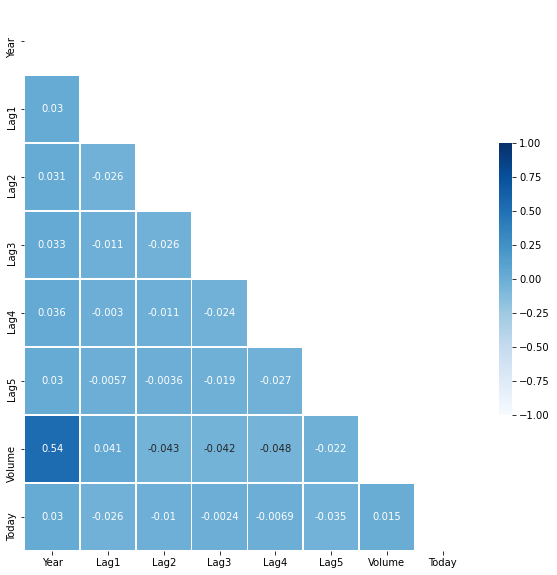

In [182]:
corr = df.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(10,10) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(corr, 
            cmap='Blues', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

#### 2.1.3 데이터 전처리

분석할 입력변수인 Volume만 불러온 뒤 min-max normalization을 실행하여 데이터 간의 격차를 줄여줍니다. 질적변수를 모델에 넣기 위하여 인코딩 과정을 거처야 합니다. Up을 1, Down이 0이 되도록 지정합니다.

In [184]:
X = df["Volume"].to_numpy().reshape(-1,1)
X = (X - np.min(X,axis=0)) / (np.max(X,axis=0) - np.min(X,axis=0))

Y = df["Direction"]
Y = np.where(np.array(Y).reshape(-1,1) == "Up",1,0)

데이터의 성능을 검증하기 위하여 train data와 validation data를 8:2의 비율로 나누겠습니다.

In [185]:
train = np.random.choice(int(len(X)),int(len(X) * 0.8),replace = False)

idx_train = np.array([])
idx_test = np.array([])
for i in np.arange(len(data)):
    if i in train:
        idx_train = np.append(idx_train,i)
    else:
        idx_test = np.append(idx_test,i)
idx_train = idx_train.astype("int16")
idx_test = idx_test.astype("int16")
        
        
X_train = X[idx_train]
Y_train = Y[idx_train]

X_test = X[idx_test]
Y_test = Y[idx_test]

상관계수를 살펴본 결과 Year와 Volume은 다른 변수에 비해서 눈에 띄는 양의 상관관계를 가진다는 것을 알 수가 있어 두 변수는 관련성이 높다고 볼 수 있습니다.

#### 2.1.4 로지스틱 모델

df.info()함수를 통하여 direction 변수의 타입이 object로 질적변수임을 알 수가 있었습니다. direction을 출력변수로 하여 나머지 변수는 입력변수인 로지스틱 회귀 모델을 만들어 보겠습니다. 로지스틱 회귀 모델은 이진 분류로 보통 0과 1로 인코딩이 되어지는데 예측이 되어진 결과의 의미는 P(X=1)로 X가 1이 나올 확률을 의미 합니다. 식은 아래와 같습니다.
$$ \hat{p}(X) =  {e^{\hat{B_0}+\hat{B_1}X} \over 1+e^{\hat{B_0}+\hat{B_1}X}}$$위의 식에서 추정해야 하는 모수는 $B_0$와 $B_1$입니다. 이 모수를 추정하는 방법을 OLS가 아닌 최대가능도 추정법을 사용해야 합니다.

변수들의 전처리가 끝났으니 sklearn에 구현된 로지스틱 회귀모델을 구축하겠습니다.

In [186]:
model = LogisticRegression()
model.fit(X_train,Y_train)

C:\Users\Elite\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

#### 2.1.5 모델 검정

만들어진 모델의 분류에 대한 정확도는 model.score()를 사용하여 아래와 같이 나왔습니다.


In [188]:
model.score(X_test,Y_test)

0.5625

In [189]:
confusion_matrix(Y_test,model.predict(X_test))

array([[17,  1],
       [13,  1]], dtype=int64)

In [190]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, model.predict(X_test), target_names=["Down","Up"]))

              precision    recall  f1-score   support

        Down       0.57      0.94      0.71        18
          Up       0.50      0.07      0.12        14

    accuracy                           0.56        32
   macro avg       0.53      0.51      0.42        32
weighted avg       0.54      0.56      0.45        32



### 2.2 선형판별분석(Linear Discriminant Analysis)

앞서 로지스틱 회귀 분류 모델을 사용하여 이진 분류 모델을 만들어 보았습니다. 하지만 대부분의 분류문제들은 적어도 2개 이상의 클래스를 가지는 범주형 변수들이 많습니다. 이진분류에서는 강한 면모를 보이는 로지스틱 회귀 모델이지만 클래스가 2개 이상인 다중분류 문제는 약간 버거운 면모를 보입니다. 이러한 다중 분류 문제를 해결 할 수 있는 모델인 선형 판별 분석에 대하여 배워보겠습니다.

#### 2.2.1 데이터 구조 파악

다중분류모델을 만들기 위하여 출력변수의 클래스가 3개 이상인 데이터인 붓꽃 데이터를 가져오겠습니다. 붓꽃 데이터의 클래스는 Setosa,Virsicolour,Virginica로 총 3개 입니다. 각 클래스 마다 50개의 데이터가 존재하기에 총 데이터 개수는 150개 입니다. 입력변수는 4가지로 모두 cm 단위인 양적 입력 변수 입니다.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
df = load_iris()
print(df["DESCR"])
"빼고 함수로 다시 설명하기"

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

iris 데이터가 한번에 보기 어려우니 좀 더 보기 좋은 형태인 pandas 데이터프레임으로 만들겠습니다.

In [2]:
data = pd.DataFrame(df["data"],columns=df["feature_names"])
data["target"] = df["target"]
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### 2.2.2 데이터 전처리

선형판별분석은 1개의 입력변수와 1개의 출력변수(2개이상의 범주)로 이루어진 모델이므로 입력변수를 sepal_lenght 1개로 정해놓고 분석을 하겠습니다.

In [3]:
X = df["data"][:,0].reshape(-1,1)
Y = df["target"].reshape(-1,1)

독립변수간의 단위는 동일하지만 컴퓨터 연산상의 이득을 얻기 위하여 min-max scaling을 해줍니다.

In [7]:
X = (X - np.min(X,axis=0)) / (np.max(X,axis=0) - np.min(X,axis=0))

데이터의 성능을 검증하기 위하여 train data와 validation data를 6:4의 비율로 나누겠습니다. 비율을 나눌때 반복추출이 없어야 하며 훈련데이터와 테스트 데이터에 중복이 되는 데이터가 없어야 합니다.

In [8]:
train = np.random.choice(int(len(X)),int(len(X) * 0.6),replace = False)

idx_train = np.array([])
idx_test = np.array([])
for i in np.arange(len(data)):
    if i in train:
        idx_train = np.append(idx_train,i)
    else:
        idx_test = np.append(idx_test,i)
idx_train = idx_train.astype("int16")
idx_test = idx_test.astype("int16")
        
X_train = X[idx_train]
Y_train = Y[idx_train]

X_test = X[idx_test]
Y_test = Y[idx_test]
"~ sklearn패키지 사용해서 바꾸기" 

#### 2.2.3 상관 분석

앞선 자료의 설명에서 입력변수간의 상관계수를 구하였지만 해당 상관계수가 저 결과와 동일한지 확인하기 위하여 상관계수를 구하여 보겠습니다.

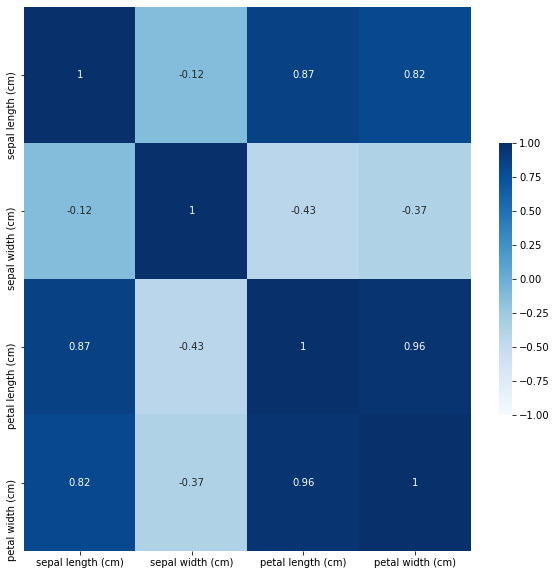

In [9]:
corr = data.iloc[:,:4].corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(10,10) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(corr, 
            cmap='Blues', 
            annot = True,   # 실제 값을 표시한다
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

#### 2.2.4 선형판별분석

선형판별분석은 데이터들을 한 개의 축에 사영시켰을 때 클래스들 간에 분류가 되어지는 결정경계를 구하는 분석으로 해당 분석의 분포의 가정을 정규분포라고 두면 로지스틱 회귀와 매우 유사한 형태를 띄지만 로지스틱 회귀보다 다분류 문제에서 더 높은 안정성을 가지기에 자주 사용되어 집니다.

판별분석의 판별함수는 베이즈 정리를 통하여 정의가 가능합니다. 베이즈 정리의 식은 아래와 같습니다.

$$P(Y=k|X=x) = {\pi_k*f_k(x)\over \sum^K_{l=1} \pi_l*f_l(x)}$$ 

판별분석이 베이즈 정리를 사용하는 이유는 조건부 확률$P(X=x|Y=k)$ 와 사전확률 $P(X=x)$,$P(Y=k)$를 사용하여 $P(Y=k|X=x)$를 구하기 때문 입니다. 이 말의 의미는 새로운 데이터 x가 들어왔을 때 Y의 k번째  클래스에 들어갈 확률을 구한다는 의미입니다.

분포의 가정을 정규분포일때 $f_k(x)$ 식은 아래와 같습니다.

$$f_k(x) = {1 \over \sqrt{2\pi}\sigma_k}exp(-{1\over2\sigma^2_k}(x-\mu_k)^2)$$

정규분포를 따르는 판별함수의 식은 아래오 같습니다.
$$\sigma_k(x) = x * {\mu_k \over \sigma^2} - {\mu_k^2 \over 2\sigma^2} + log(\pi_k)$$

판별함수의 식이 위와 같이 x의 선형함수이기 때문에 선형이라는 말이 붙게 되었습니다. 새로 들어오는 관측치를 판별함수에 대입하여 최대가 되는 클래스에 관측치를 할당합니다. 판별함수의 목적인 결정경계를 구하기 위해서는 각 클래스 표본평균들 사이의 중간지점에 해당됩니다.

~함수 식들은 참고로 빼주는게 좋을거 같다
~베이즈 정리가 무엇인지에 대한 예시만 

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis(n_components=1)
LDA.fit(X_train,Y_train)

C:\Users\Elite\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LinearDiscriminantAnalysis(n_components=1)

#### 2.2.5 모델 검정

In [11]:
LDA.score(X_test,Y_test)

0.65

In [15]:
setosa = X_test[np.where(np.hstack([X_test,Y_test])[:,1] == 0)]
verge = X_test[np.where(np.hstack([X_test,Y_test])[:,1] == 1)]
virgin = X_test[np.where(np.hstack([X_test,Y_test])[:,1] == 2)]

In [16]:
setosa

array([[0.16666667],
       [0.19444444],
       [0.30555556],
       [0.19444444],
       [0.02777778],
       [0.13888889],
       [0.13888889],
       [0.        ],
       [0.38888889],
       [0.38888889],
       [0.22222222],
       [0.25      ],
       [0.33333333],
       [0.22222222],
       [0.02777778],
       [0.19444444],
       [0.13888889],
       [0.19444444]])

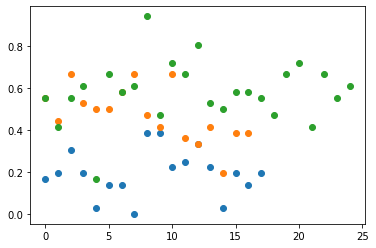

In [18]:
plt.scatter(np.arange(len(setosa)),setosa)
plt.scatter(np.arange(len(verge)),verge)
plt.scatter(np.arange(len(virgin)),virgin)

#### 2.2.6 이차선형판별분석(Quardratic Discriminant Analysis)

이차선형판별분석은 정규분포를 가정하여 베이즈 정리를 이용한 분류를 한다는 점에서는 서로 유사하지만 모든 클래스k에 대하여 동일한 공분산 행렬을 가정했던 LDA와 달리 QDA는 k클래스 마다 각각의 공분산 행렬을 가지게 합니다.

In [27]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train,Y_train)

C:\Users\Elite\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


QuadraticDiscriminantAnalysis()

In [28]:
QDA.score(X_test,Y_test)

0.65

~knn 추가하기
~NB 추가하기